In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import GPy
import pyro
from BNN_Dropout import NN_Dropout, BNN_Dropout
from BNN_SGDHMC import BNN_SGDHMC
from BNN_SVI import BNN_SVI
from BNN_BBB import BNN_BBB


from Benchmark import RandomNN
from pybnn.bohamiann import Bohamiann

plt.rcParams['figure.figsize'] = (12.0, 8)


 /home/alaya/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.


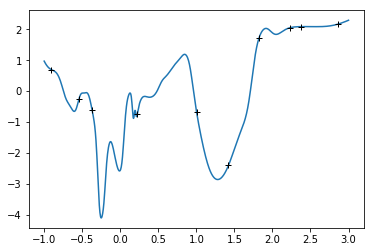

In [2]:
bench = RandomNN(1,3,50,nn.Tanh())
bench.rand_normal_weight(1)
num_plot  = 1000
num_train = 10
x = torch.linspace(-1,3,num_plot)[:,None]
y = bench(x).detach()
train_id = np.random.permutation(num_plot)[:num_train]
train_x = x[train_id]
train_y = y[train_id]
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')

In [3]:
conf = dict()
conf['num_epochs'] = 1600
conf['num_hidden'] = 50
conf['num_layers'] = 3
conf['batch_size'] = 128


conf['dropout_rate'] = 0.01
conf['lr']           = 0.01
conf['tau']          = 1.5 #0.15
conf['lscale']       = 0.25


model = BNN_Dropout(1,nn.Tanh(), conf)

conf_hmc = dict()
hmc_model = BNN_SGDHMC(dim = 1, act = nn.Tanh(), conf = conf_hmc)
kern = GPy.kern.RBF(input_dim = 1)
gp = GPy.models.GPRegression(X=train_x.numpy(), Y= train_y.detach().numpy(), kernel=kern)
gp.likelihood.variance = 1e-2

conf_svi = dict()
conf_svi['num_iters'] = 4000
conf_svi['lr'] = 1e-2
conf_svi['num_layers'] = 1
conf_svi['noise_level'] = 0.05
svi_model = BNN_SVI(dim = 1, act = nn.Tanh(), conf = conf_svi)

conf_bbb                = dict()
conf_bbb['num_epochs']  = 4000
conf_bbb['batch_size']  = 25
conf_bbb['num_layers']  = 1
conf_bbb['print_every'] = 50
conf_bbb['lr']          = 1e-2
conf_bbb['n_samples']   = 4
conf_bbb['noise_level'] = 0.05
bbb_model                   = BNN_BBB(dim = 1, act = nn.Tanh(), conf = conf_bbb)

In [4]:
bbb_model.train(train_x,train_y)
svi_model.train(train_x, train_y)
hmc_model.train(train_x, train_y)
model.train(train_x, train_y)
gp.optimize()

[Epoch    50, loss = 628.9 (KL = 53.81, -log_lik = 575)]
[Epoch   100, loss = 353.3 (KL = 57.09, -log_lik = 296.2)]
[Epoch   150, loss = 264.8 (KL = 58.28, -log_lik = 206.5)]
[Epoch   200, loss = 198.8 (KL = 38.7, -log_lik = 160.1)]
[Epoch   250, loss = 160.4 (KL = 5.719, -log_lik = 154.7)]
[Epoch   300, loss = 84.36 (KL = -14.96, -log_lik = 99.32)]
[Epoch   350, loss = 58.33 (KL = -24.56, -log_lik = 82.89)]
[Epoch   400, loss = 17.32 (KL = -45.49, -log_lik = 62.81)]
[Epoch   450, loss = 7.894 (KL = -59.88, -log_lik = 67.77)]
[Epoch   500, loss = -46.81 (KL = -81.37, -log_lik = 34.56)]
[Epoch   550, loss = -70.15 (KL = -101.5, -log_lik = 31.34)]
[Epoch   600, loss = -111.5 (KL = -129, -log_lik = 17.54)]
[Epoch   650, loss = -127.5 (KL = -138.5, -log_lik = 11.03)]
[Epoch   700, loss = -156.8 (KL = -166.3, -log_lik = 9.486)]
[Epoch   750, loss = -221 (KL = -223.6, -log_lik = 2.58)]
[Epoch   800, loss = -207.9 (KL = -209.1, -log_lik = 1.164)]
[Epoch   850, loss = -270.7 (KL = -268.5, -log

Step      100 : NLL =  8.9603e+02 MSE = 4.3222e+00 Time =  0.45
Step      200 : NLL =  1.1310e+03 MSE = 4.4344e+00 Time =  0.95
Step      300 : NLL =  1.3855e+03 MSE = 4.4671e+00 Time =  1.36
Step      400 : NLL =  1.7181e+03 MSE = 4.4638e+00 Time =  1.87
Step      500 : NLL =  2.0765e+03 MSE = 4.3559e+00 Time =  2.28
Step      600 : NLL =  2.5396e+03 MSE = 4.4271e+00 Time =  2.71
Step      700 : NLL =  3.0626e+03 MSE = 4.4290e+00 Time =  3.12
Step      800 : NLL =  3.5965e+03 MSE = 4.3741e+00 Time =  3.53
Step      900 : NLL =  4.4660e+03 MSE = 4.4501e+00 Time =  4.05
Step     1000 : NLL =  5.2341e+03 MSE = 4.4312e+00 Time =  4.47
Step     1100 : NLL =  6.4857e+03 MSE = 4.4207e+00 Time =  4.89
Step     1200 : NLL =  7.9219e+03 MSE = 4.4414e+00 Time =  5.30
Step     1300 : NLL =  9.6096e+03 MSE = 4.4477e+00 Time =  5.74
Step     1400 : NLL =  1.1813e+04 MSE = 4.4586e+00 Time =  6.40
Step     1500 : NLL =  1.4468e+04 MSE = 4.4472e+00 Time =  6.96
Step     1600 : NLL =  1.8464e+04 MSE = 

 /mnt/c/code/pybnn/pybnn/bohamiann.py:119: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Step     2100 : NLL =  4.8868e+04 MSE = 4.4374e+00 Samples= 1 Time = 10.11
Step     2200 : NLL =  4.3397e+03 MSE = 4.4035e+00 Samples= 3 Time = 10.47
Step     2300 : NLL =  4.2435e+03 MSE = 4.3970e+00 Samples= 5 Time = 10.93
Step     2400 : NLL =  4.6744e+03 MSE = 4.4095e+00 Samples= 7 Time = 11.41
Step     2500 : NLL =  4.6351e+03 MSE = 4.4182e+00 Samples= 9 Time = 11.90
Step     2600 : NLL =  4.7128e+03 MSE = 4.4227e+00 Samples= 11 Time = 12.26
Step     2700 : NLL =  4.9739e+03 MSE = 4.4235e+00 Samples= 13 Time = 12.65
Step     2800 : NLL =  5.3963e+03 MSE = 4.4249e+00 Samples= 15 Time = 13.06
Step     2900 : NLL =  5.8093e+03 MSE = 4.4264e+00 Samples= 17 Time = 13.44
Step     3000 : NLL =  6.2623e+03 MSE = 4.4271e+00 Samples= 19 Time = 13.81
Step     3100 : NLL =  6.6648e+03 MSE = 4.4274e+00 Samples= 21 Time = 14.20
Step     3200 : NLL =  7.0386e+03 MSE = 4.4278e+00 Samples= 23 Time = 14.60
Step     3300 : NLL =  7.0119e+03 MSE = 4.4275e+00 Samples= 25 Time = 14.99
Step     3400 : N

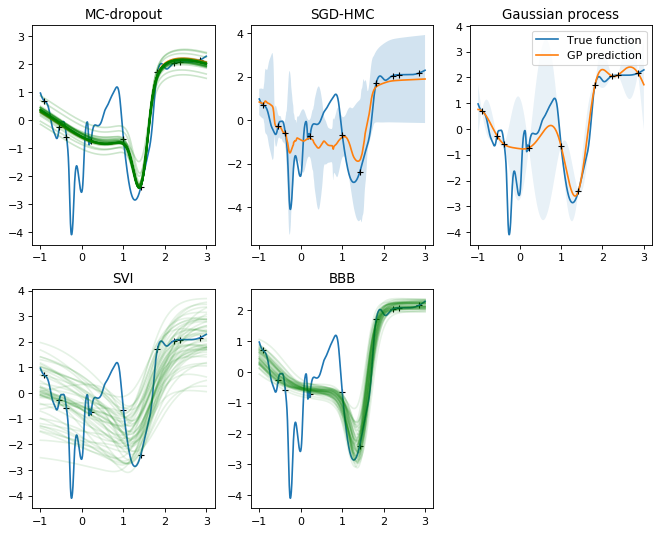

In [6]:
#py = model.predict(x)
py,pv = model.predict_mv(x)
ps = torch.sqrt(pv)
m_hmc,v_hmc = hmc_model.predict_mv(x)
m_hmc = m_hmc.detach().numpy().reshape(num_plot)
s_hmc   = v_hmc.sqrt().detach().numpy().reshape(num_plot)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')


plt.subplot(231)
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.plot(x.numpy(),py.detach().numpy(),label = 'Pred')
plt.fill_between(
    x.numpy().reshape(num_plot), 
    (py - ps).reshape(num_plot).detach().numpy(), 
    (py + ps).reshape(num_plot).detach().numpy(), alpha = 0.0)
for i in range(50):
    net = model.sample()
    py  = net((x - model.x_mean) / model.x_std) * model.y_std + model.y_mean
    plt.plot(x.numpy(),py.detach().numpy(), 'g', alpha = 0.2)
plt.title('MC-dropout')

plt.subplot(232)
plt.plot(x.numpy(), y.detach().numpy())
plt.plot(x.numpy(), m_hmc)
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.fill_between(x.numpy().reshape(num_plot), m_hmc +3* s_hmc, m_hmc -3* s_hmc, alpha = 0.2)
plt.title('SGD-HMC')

plt.subplot(233)
gp_m, gp_v = gp.predict(x.numpy())
plt.plot(x.numpy(), y.detach().numpy(), label = 'True function')
plt.plot(x.numpy(), gp_m, label = 'GP prediction')
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.fill_between(x.numpy().reshape(num_plot), (gp_m - 3 * np.sqrt(gp_v)).reshape(num_plot), (gp_m + 3 * np.sqrt(gp_v)).reshape(num_plot), alpha = 0.1)
plt.legend()
plt.title('Gaussian process')


plt.subplot(234)
plt.title('SVI')
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.plot(x.numpy(), y.detach().numpy(), label = 'True function')

num_samples = 50;
for i in range(50):
    r_net = svi_model.sample()
    py     = svi_model.sample_predict(r_net,x)
    plt.plot(x.numpy(), py.detach().numpy(),'g',alpha = 0.1)
    
plt.subplot(235)
plt.title('BBB')
plt.plot(train_x.numpy(), train_y.detach().numpy(),'k+')
plt.plot(x.numpy(), y.detach().numpy(), label = 'True function')

num_samples = 50;
for i in range(50):
    py,_    = bbb_model.nn((x - bbb_model.x_mean) / bbb_model.x_std) 
    py       = py * bbb_model.y_std + bbb_model.y_mean
    plt.plot(x.numpy(), py.detach().numpy(),'g',alpha = 0.1)

In [13]:
xs = torch.linspace(-10,10,1000)
f = nn.Softplus()

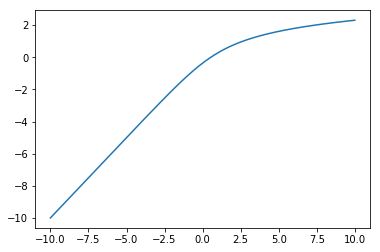

In [18]:
plt.plot(xs.numpy(), f(xs).log().detach().numpy())

In [16]:
f(xs).min()

tensor(4.5399e-05)